In [1]:
%pylab inline

import os, sys
import scipy
import helpers as h
from glob import glob
from scipy.io import loadmat
from scipy.sparse.linalg import eigsh
from mpl_toolkits import mplot3d
from scipy.stats import skewnorm 
from scipy.stats import skew, kurtosis
import matplotlib.gridspec as Gridspec

plt.rcParams['figure.figsize'] = (15, 5) 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Defining function for computations

In [35]:
def abib_cdf(r, r_min = -np.inf, **kwargs):
    r_kept = r[r>r_min]
    lenr = len(r)
    lenr_kept = len(r_kept)
    print(f"Dropped {lenr - lenr_kept} values less than {r_min=}")
    x = sorted(r_kept)
    y = arange(1, len(r_kept)+1)/(len(r_kept))
    plot(x,y, **kwargs)
    xlabel("Samples"); ylabel("Cumulative Probability")
    return r_kept
        

In [3]:
data_root = "/Users/duuta/ppp/data/stringer/"
data_files = [fname.split("/")[-1] for fname in glob(f"{data_root}natimg2800_M*.mat")]
# data_files

In [4]:
data = loadmat(os.path.join(data_root, data_files[1])
               ,simplify_cells = True) 

In [5]:
spont = data['stim']['spont']
resp = data['stim']['resp']

Dropped 2684 values less than r_min=-2
Dropped 0 values less than r_min=-inf


/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_38052/3664251356.py:1: RuntimeWarning: divide by zero encountered in log10
  r_kept = abib_cdf(log10(resp[0]), r_min=-2);


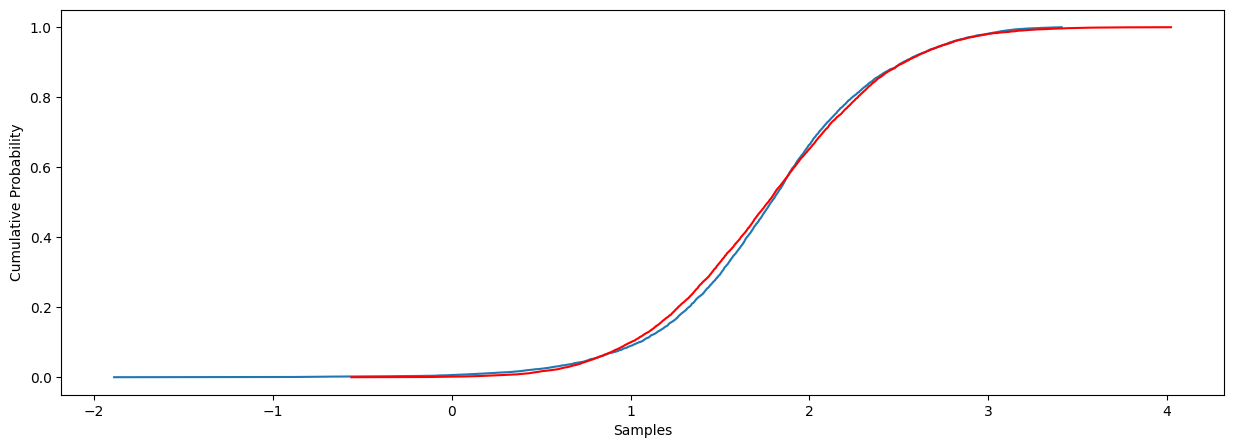

In [6]:
r_kept = abib_cdf(log10(resp[0]), r_min=-2);
gauss_data = randn(10000,)* std(r_kept) + mean(r_kept)
abib_cdf(gauss_data, c="r");
xlabel("Samples"); ylabel("Cumulative Probability");

In [7]:
skew(r_kept), mean(r_kept), var(r_kept)

(-0.3648815562804602, 1.7713876, 0.35429034)

In [11]:
# abib_cdf(skew_data, label='artificial')
# abib_cdf(r_kept, label='real');
# legend();

#  Working location, scale and shape parameters in terms of mean, skewness and variance

Let $\alpha, \omega , \xi $ denote the shape, scale, and location parameters of a skewguassian, then in terms of these parameters  the variance ($v$), mean($\mu$), skewness($s$), of the distribution are given as:

$$ s = \frac{4 - \pi}{2} \frac{ \left( \delta \sqrt{ \frac{2}{\pi} } \right)^{\!3} } {\left(1 - \frac{2\delta^{2}}{\pi}\right)^{\!3/2}} $$ 



$$ v  =  \omega^{2}\left( 1 - \frac{2{\delta}^{2}}{\pi} \right)$$

$$ \mu  = \xi + \omega \delta \sqrt{\frac{2}{\pi}}$$

where $\delta = \frac{\alpha}{\sqrt{1 + \alpha^{2}}} $

Let $$r = \left( 1 + \frac{2}{\pi} \left( \frac{s}{c}\right)^{\!2/3}\right)^{\!-1}$$

where $s$ is the skewness, and $c = \frac{4 - \pi}{2} \left(\sqrt{\frac{2}{\pi}} \right)^{\!3} $.

We write the shape($\alpha$), location ($\xi$) and scale ($\omega$) parameters in terms of the mean($\mu$), variance($v$) and skewness ($s$) parameters.

Thus using $r$, we have that  $$ v \left( 1 + \frac{2}{\pi} \left( \frac{s}{c}\right)^{\!2/3}\right) = \omega^{2} $$ 


$$ \mu \mp \sqrt{v \left( 1 + \frac{2}{\pi} \left( \frac{s}{c}\right)^{\!2/3}\right)} \left( \frac{2}{\pi}(1 - r) \right)^{\! 1/2} \sqrt{\frac{2}{\pi}}  = \xi$$


$$ \sqrt{\left\{ \frac{1}{1 - \frac{2}{\pi}(1-r)} - 1\right\}}=\alpha$$


and $$ k = \frac{2}{\pi}(1-r)$$ and $$q = \frac{1}{ 1 - k }$$

In [22]:
# setting variables
mu = 1.7713
v = 0.3543
c = ((4 - pi)/2) * sqrt(2/pi)**3
s= -0.36488 
r = (2/pi) * (cbrt(s/c))**2

k = (2/pi) * (1 - r)

# the scale parameter is
scale2 = v*r 
scale_ = sqrt(scale2)

# location parameter is 
loc_ = mu + sqrt(scale2)* (sqrt(k*2/pi))
loc__ = mu - (sqrt(scale2) * sqrt(k*2/pi))
              
# shape parameter
q = 1.0/(1 - k)
shape_ =  sqrt(q -1)

#  create function that returns shape, scale and location, given variance, mean and skewness
# then apply to spontaneous activity

In [31]:
def get_parameters_skew(data):
    """function return the shape(sh), scale (sc) and location (loc),
       parameters for a skewed gaussian, given a data set.
       It computes the mean, skewness and variance of the dataset then finds
       these skew gaussian parameters in terms of these.
    """
    mu = mean(data)
    s= skew(data)
    v = var(data)
    c = ((4 - pi)/2) * sqrt(2/pi)**3
    r = (2/pi) * (cbrt(s/c))**2
    k = (2/pi) * (1 - r)
    q = 1.0/(1 - k)
    scale2 = v*r
    sc = sqrt(scale2) 
    loc = mu + sqrt(scale2)* (sqrt(k*2/pi))
    sh =  sqrt(q-1) 
    
    return sc, sh, loc

In [23]:
sc, sh, loc = get_parameters_skew(r_kept)

In [28]:
sk2= skewnorm.rvs(a=-0.3648, loc=loc, scale=sc, size=1000)

Dropped 0 values less than r_min=-inf
Dropped 0 values less than r_min=-inf


Text(0.5, 1.0, 'Fitting Skew Gaussian to Response')

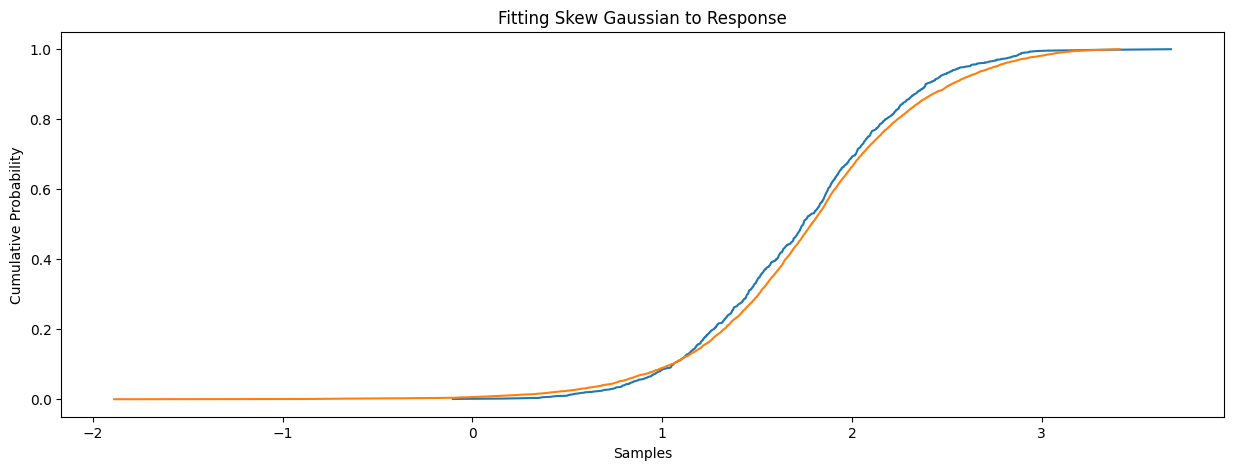

In [38]:
abib_cdf(sk2, label='fit')
abib_cdf(r_kept, label='data');
title("Fitting Skew Gaussian to Response")